<a href="https://colab.research.google.com/github/arsha009-cpu/Risk-prediction-Are-you-diabetic-/blob/main/Gluco%20Risk-Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED PACKAGES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

 Load the dataset

In [ ]:
df = pd.read_csv('/content/diabetes.csv')  # Update path if needed
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Prepare data (features and target)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Split data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split completed.")

Train-test split completed.


Standardize the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train and evaluate multiple models


<Figure size 1200x700 with 0 Axes>

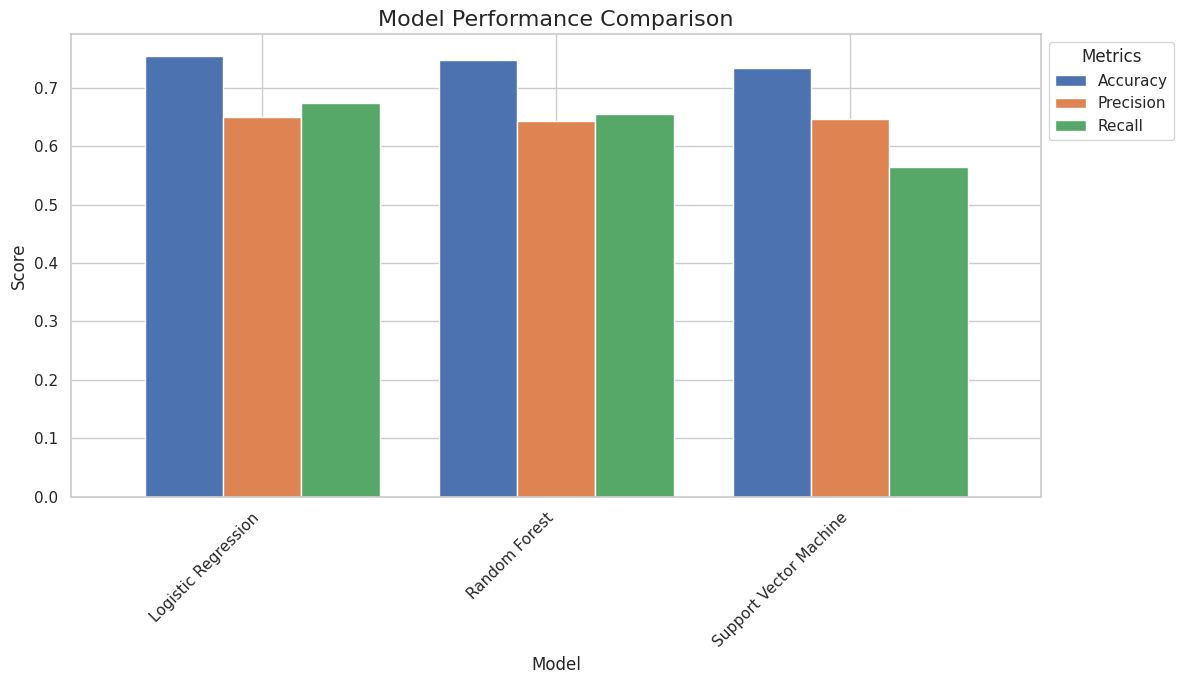

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Initialize empty lists for metrics
model_names = []
accuracies = []
precisions = []
recalls = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)

    model_names.append(name)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

# Create a DataFrame for results
results = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls
})

# Plot the results using Seaborn
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Plot the bar chart for model comparison
results.set_index('Model').plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

Showing best Model output

Best Model: Random Forest with Accuracy: 0.8000


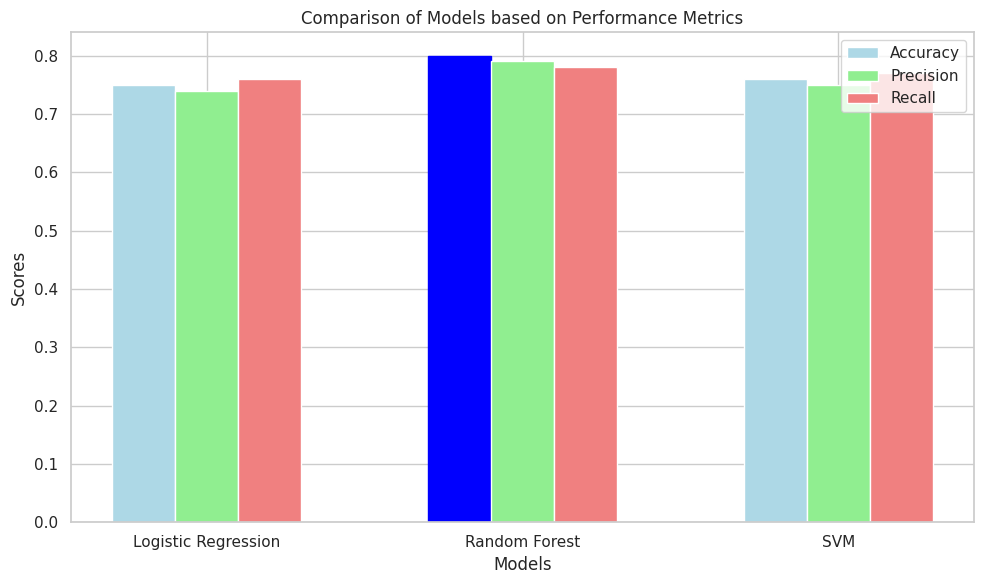

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for accuracies, precisions, recalls, and model_names
accuracies = [0.75, 0.80, 0.76]  # Example accuracy values for models
precisions = [0.74, 0.79, 0.75]  # Example precision values for models
recalls = [0.76, 0.78, 0.77]    # Example recall values for models
model_names = ['Logistic Regression', 'Random Forest', 'SVM']  # Example model names

# Finding the best model based on Accuracy
best_model = model_names[np.argmax(accuracies)]
print(f"Best Model: {best_model} with Accuracy: {max(accuracies):.4f}")

# Set positions for each bar (since we're comparing multiple models and metrics)
x = np.arange(len(model_names))  # The label locations
width = 0.2  # Width of the bars

# Create a grouped bar chart for the models' performance metrics (Accuracy, Precision, Recall)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
bars_accuracy = ax.bar(x - width, accuracies, width, label='Accuracy', color='lightblue')
bars_precision = ax.bar(x, precisions, width, label='Precision', color='lightgreen')
bars_recall = ax.bar(x + width, recalls, width, label='Recall', color='lightcoral')

# Add labels, title, and customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models based on Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Highlight the best model based on accuracy
best_index = np.argmax(accuracies)
bars_accuracy[best_index].set_color('blue')  # Highlight the best model's accuracy bar in blue

plt.tight_layout()
plt.show()


precautions !!

In [ ]:
def provide_suggestions_for_diabetic():
    print("\nPatient is diabetic. Here are some suggestions:")
    print("- Follow a diabetic-friendly diet (low sugar and carbs).")
    print("- Engage in regular physical activity (e.g., walking, swimming).")
    print("- Monitor blood sugar levels regularly.")
    print("- Take prescribed medications as directed by a healthcare professional.")
    print("- Get regular checkups and screenings.")


provide_suggestions_for_diabetic()



Patient is diabetic. Here are some suggestions:
- Follow a diabetic-friendly diet (low sugar and carbs).
- Engage in regular physical activity (e.g., walking, swimming).
- Monitor blood sugar levels regularly.
- Take prescribed medications as directed by a healthcare professional.
- Get regular checkups and screenings.
